In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import platform 

if (platform.system() == 'Windows'):  # Windows
    rc('font', family=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name())
    path = '.' # Local
else:    
    plt.rc('font', family='NanumBarunGothic')  # Ubuntu 18.04 기준 한글 처리
    path = '/content/drive/My Drive/ai_202102_ml/rnn/naver_movie' # Colab

plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline 

[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347 -3.97959184
 -3.7755102  -3.57142857 -3.36734694 -3.16326531 -2.95918367 -2.75510204
 -2.55102041 -2.34693878 -2.14285714 -1.93877551 -1.73469388 -1.53061224
 -1.32653061 -1.12244898 -0.91836735 -0.71428571 -0.51020408 -0.30612245
 -0.10204082  0.10204082  0.30612245  0.51020408  0.71428571  0.91836735
  1.12244898  1.32653061  1.53061224  1.73469388  1.93877551  2.14285714
  2.34693878  2.55102041  2.75510204  2.95918367  3.16326531  3.36734694
  3.57142857  3.7755102   3.97959184  4.18367347  4.3877551   4.59183673
  4.79591837  5.        ]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


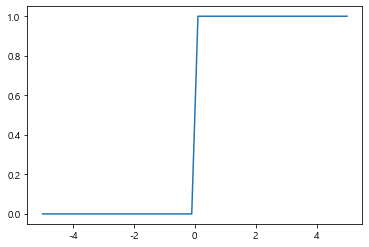

In [6]:
# 계단 함수, 초창기 퍼셉트론(인공신경망)의 활성화 함수
def step_function(x):
    return np.where(x < 0, 0, 1) # x가 0보다 작으면 0, 그렇지 않으면 1
    # return np.where(x < 0, -1, 1)

x = np.linspace(-5, 5, 50) # -5 ~ 5의 구간을 50 개로 분할
print(x)
y = step_function(x)
print(y)
plt.plot(x, y)
plt.show()

[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347 -3.97959184
 -3.7755102  -3.57142857 -3.36734694 -3.16326531 -2.95918367 -2.75510204
 -2.55102041 -2.34693878 -2.14285714 -1.93877551 -1.73469388 -1.53061224
 -1.32653061 -1.12244898 -0.91836735 -0.71428571 -0.51020408 -0.30612245
 -0.10204082  0.10204082  0.30612245  0.51020408  0.71428571  0.91836735
  1.12244898  1.32653061  1.53061224  1.73469388  1.93877551  2.14285714
  2.34693878  2.55102041  2.75510204  2.95918367  3.16326531  3.36734694
  3.57142857  3.7755102   3.97959184  4.18367347  4.3877551   4.59183673
  4.79591837  5.        ]


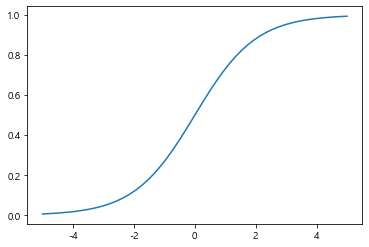

In [7]:
# Sigmoid 함수: 이항 분류, 참/거짓, 합격/불합격, 성공/실패,
# 생존/사망, 양성/음성...
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x)) # np.exp 함수는 무리수, 지수 e: 2.71828...

x = np.linspace(-5, 5, 50)
print(x)
y = sigmoid_function(x)

plt.plot(x, y)
plt.show()

[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347 -3.97959184
 -3.7755102  -3.57142857 -3.36734694 -3.16326531 -2.95918367 -2.75510204
 -2.55102041 -2.34693878 -2.14285714 -1.93877551 -1.73469388 -1.53061224
 -1.32653061 -1.12244898 -0.91836735 -0.71428571 -0.51020408 -0.30612245
 -0.10204082  0.10204082  0.30612245  0.51020408  0.71428571  0.91836735
  1.12244898  1.32653061  1.53061224  1.73469388  1.93877551  2.14285714
  2.34693878  2.55102041  2.75510204  2.95918367  3.16326531  3.36734694
  3.57142857  3.7755102   3.97959184  4.18367347  4.3877551   4.59183673
  4.79591837  5.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.10204082 0.30612245 0.51020408 0.71428571 0.91836735
 1.12244898 1.32653061 1.53061224 1.73469388 1.93877551 2.14285714
 2.34693878 2.551020

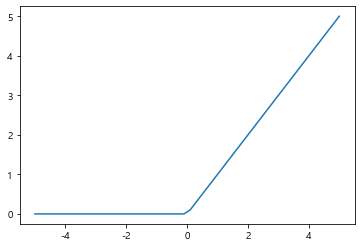

In [8]:
# ReLU 함수: 은닉층에서의 유효한 값 유지, 속도가 빠름
def relu_function(x):
    return np.where(x <= 0, 0, x)

x = np.linspace(-5, 5, 50)
print(x)
y = relu_function(x)
print(y)
plt.plot(x, y)
plt.show()

[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347 -3.97959184
 -3.7755102  -3.57142857 -3.36734694 -3.16326531 -2.95918367 -2.75510204
 -2.55102041 -2.34693878 -2.14285714 -1.93877551 -1.73469388 -1.53061224
 -1.32653061 -1.12244898 -0.91836735 -0.71428571 -0.51020408 -0.30612245
 -0.10204082  0.10204082  0.30612245  0.51020408  0.71428571  0.91836735
  1.12244898  1.32653061  1.53061224  1.73469388  1.93877551  2.14285714
  2.34693878  2.55102041  2.75510204  2.95918367  3.16326531  3.36734694
  3.57142857  3.7755102   3.97959184  4.18367347  4.3877551   4.59183673
  4.79591837  5.        ]
[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347 -3.97959184
 -3.7755102  -3.57142857 -3.36734694 -3.16326531 -2.95918367 -2.75510204
 -2.55102041 -2.34693878 -2.14285714 -1.93877551 -1.73469388 -1.53061224
 -1.32653061 -1.12244898 -0.91836735 -0.71428571 -0.51020408 -0.30612245
 -0.10204082  0.10204082  0.30612245  0.51020408  0.71428571  0.91836735
  1.12244898  1.32653061 

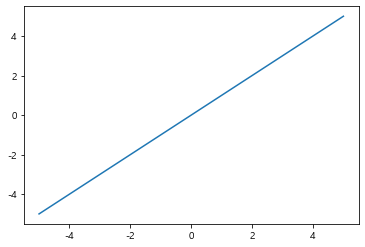

In [9]:
# 항등 함수: 수치예측 선형회귀에서 계산된값을 그대로 출력
x = np.linspace(-5, 5, 50)
print(x)
y = x
print(y)
plt.plot(x, y)
plt.show()

[1 2 3]
[0.09003057 0.24472847 0.66524096]
Total: 1.0


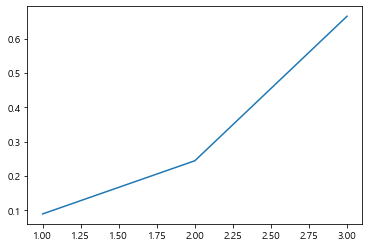

In [10]:
# Softmax 함수: 합이 1이됨, 비중이 작으면 더 작은값,
#               비중이 크면 더 큰값으로 출력함
# 예) 다중 분류, 사물 인식, 품종 분류
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

x = np.array([1, 2, 3])
print(x)
y = softmax_function(x)
print(y)
# 1/6 = 0.16이 아님 0.09003057
# 3/6 = 0.5가 아님 0.66524096
print('Total:', np.sum(y))  
plt.plot(x, y)
plt.show()

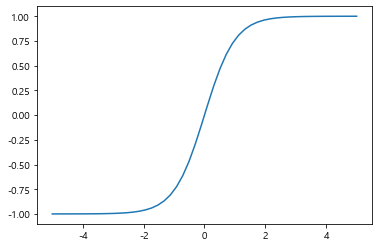

In [11]:
# 하이퍼볼릭 탄젠트, RNN 등 순환 신경망에 주로 사용
# 순서가 있는 언어의 조합, 시계열 자료 예측
def tanh_function(x):
    return np.tanh(x)

x = np.linspace(-5, 5, 50)
y = tanh_function(x)

plt.plot(x, y)
plt.show()